# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [70]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [23]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [24]:
test_path= '../input/happydataset/test_happy.h5'
train_path= '../input/happydataset/train_happy.h5'
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset(train_path,test_path)

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)
The person is happy '1' or not happy '0' : [1]


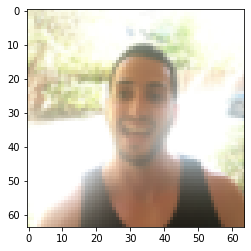

In [25]:
# Sample image from dataset
print("Image shape :",X_train_orig[380].shape)
imshow(X_train_orig[380])
print("The person is happy '1' or not happy '0' :", Y_train[380])

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [26]:
model = Sequential([
     # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3),padding="same", activation='relu', input_shape=(64, 64, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  #tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  #tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  #tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 32769     
Total params: 33,793
Trainable params: 33,729
Non-trainable params: 64
_________________________________________________________________


In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [29]:

history_model = model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
19/19 [==============================] - 1s 26ms/step - loss: 1.3145 - accuracy: 0.6367
Epoch 2/10
19/19 [==============================] - 0s 26ms/step - loss: 0.2852 - accuracy: 0.8833
Epoch 3/10
19/19 [==============================] - 0s 26ms/step - loss: 0.1222 - accuracy: 0.9567
Epoch 4/10
19/19 [==============================] - 0s 26ms/step - loss: 0.0980 - accuracy: 0.9583
Epoch 5/10
19/19 [==============================] - 1s 30ms/step - loss: 0.0601 - accuracy: 0.9833
Epoch 6/10
19/19 [==============================] - 0s 26ms/step - loss: 0.0427 - accuracy: 0.9900
Epoch 7/10
19/19 [==============================] - 0s 26ms/step - loss: 0.0629 - accuracy: 0.9850
Epoch 8/10
19/19 [==============================] - 0s 26ms/step - loss: 0.0699 - accuracy: 0.9833
Epoch 9/10
19/19 [==============================] - 0s 26ms/step - loss: 0.0365 - accuracy: 0.9933
Epoch 10/10
19/19 [==============================] - 0s 25ms/step - loss: 0.0236 - accuracy: 0.9950


# Evaluate / Test

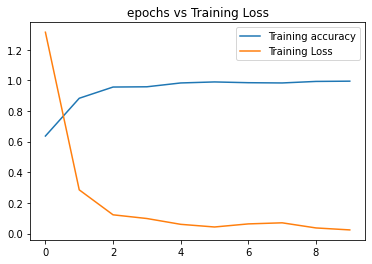

In [30]:
train_accuracy = history_model.history["accuracy"]
train_loss = history_model.history["loss"]

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

Evaluate Test set

5/5 [==============================] - 0s 7ms/step - loss: 0.3962 - accuracy: 0.9000
2


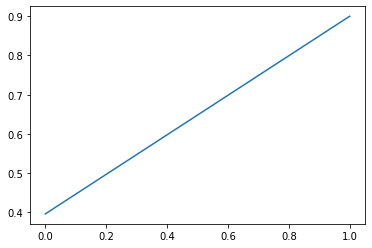

In [37]:
# code here
evaluation_test=  model.evaluate(X_test, Y_test)
print(len(evaluation_test))
plt.plot(evaluation_test)
  

- The loss on the testing set is around 0.3962 comparing to trainning set 0.0236 so there is a gap between them i think we can train it more with diffrent parameters to get a better loss for the two

Confusion Matrix

f1,  0.963855421686747
precision 0.975609756097561
recall 0.9523809523809523


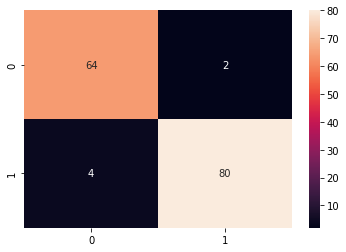

In [66]:
# Code Here
predictions = model.predict(X_test)
y_pred = (predictions > 0.5).astype(np.float32)

cf_matrix=confusion_matrix(Y_test, y_pred)

sns.heatmap(cf_matrix, annot=True)
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
print("f1, ",f1_score(Y_test, y_pred))
print("precision",precision_score(Y_test, y_pred))
print("recall",recall_score(Y_test, y_pred))

- As we notice the model could :
- predect 70 correct happy faces and 65 correct sad faces
- Only 14 predected sad actually happy and 1 happay when actually sad 
- In total 135 correct predection and 15 uncorrect 
- And all the metrics f1, precision, recall are over 90%

# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)


In [71]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)

In [73]:
def optimizer(optimizer, model, X_train, Y_train, X_test, Y_test):
    x_model= model
    x_model.compile(loss ='binary_crossentropy',metrics =['accuracy'],optimizer=optimizer)
    history_model = x_model.fit(X_train, Y_train, epochs=10)
    train_accuracy = history_model.history["accuracy"]
    train_loss = history_model.history["loss"]
    count = range(len(train_accuracy))
    plt.plot(count, train_accuracy, label='Training accuracy')
    plt.plot(count, train_loss, label='Training Loss')
    plt.title('epochs vs Training Loss')
    plt.legend()
    evaluation_test=  model.evaluate(X_test, Y_test)
    predictions = model.predict(X_test)
    y_pred = (predictions > 0.5).astype(np.float32)
    cf_matrix=confusion_matrix(Y_test, y_pred)
    sns.heatmap(cf_matrix, annot=True)
    print("f1, ",f1_score(Y_test, y_pred))
    print("precision",precision_score(Y_test, y_pred))
    print("recall",recall_score(Y_test, y_pred))

# SGD optimizer

Epoch 1/10
19/19 [==============================] - 1s 25ms/step - loss: 6.6647e-05 - accuracy: 1.0000
Epoch 2/10
19/19 [==============================] - 0s 24ms/step - loss: 5.8115e-05 - accuracy: 1.0000
Epoch 3/10
19/19 [==============================] - 0s 25ms/step - loss: 5.0302e-05 - accuracy: 1.0000
Epoch 4/10
19/19 [==============================] - 0s 26ms/step - loss: 5.0009e-05 - accuracy: 1.0000
Epoch 5/10
19/19 [==============================] - 0s 25ms/step - loss: 5.4901e-05 - accuracy: 1.0000
Epoch 6/10
19/19 [==============================] - 0s 25ms/step - loss: 5.9759e-05 - accuracy: 1.0000
Epoch 7/10
19/19 [==============================] - 0s 25ms/step - loss: 5.6422e-05 - accuracy: 1.0000
Epoch 8/10
19/19 [==============================] - 0s 25ms/step - loss: 5.4094e-05 - accuracy: 1.0000
Epoch 9/10
19/19 [==============================] - 0s 25ms/step - loss: 5.3531e-05 - accuracy: 1.0000
Epoch 10/10
5/5 [==============================] - 0s 7ms/step - loss: 0.

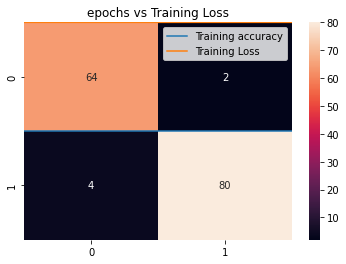

In [74]:
optimizer('SGD', model, X_train, Y_train, X_test, Y_test)

# RMSProp optimizer

Epoch 1/10
19/19 [==============================] - 1s 25ms/step - loss: 0.0038 - accuracy: 0.9983
Epoch 2/10
19/19 [==============================] - 0s 26ms/step - loss: 2.0621e-04 - accuracy: 1.0000
Epoch 3/10
19/19 [==============================] - 0s 25ms/step - loss: 4.7887e-05 - accuracy: 1.0000
Epoch 4/10
19/19 [==============================] - 0s 25ms/step - loss: 5.0704e-05 - accuracy: 1.0000
Epoch 5/10
19/19 [==============================] - 0s 25ms/step - loss: 5.3735e-04 - accuracy: 1.0000
Epoch 6/10
19/19 [==============================] - 0s 25ms/step - loss: 0.0035 - accuracy: 0.9983
Epoch 7/10
19/19 [==============================] - 0s 26ms/step - loss: 0.0020 - accuracy: 0.9983
Epoch 8/10
19/19 [==============================] - 0s 25ms/step - loss: 8.1066e-05 - accuracy: 1.0000
Epoch 9/10
19/19 [==============================] - 0s 25ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/10
5/5 [==============================] - 0s 7ms/step - loss: 0.4157 - accuracy:

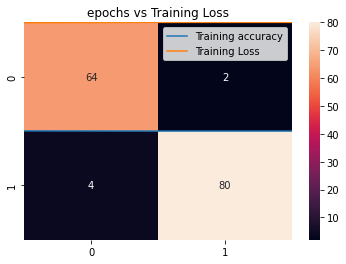

In [75]:
optimizer('RMSProp', model, X_train, Y_train, X_test, Y_test)


- In the comparison of SGD, RMSprop and Adam Optimizers, Adam got highest accuracy.